# **Employee Salary Prediction**
> **S Shreenidhi**

# 💼 Salary Prediction Using Multiple Factors

This project uses the "Data Science Job Salaries (2020–2023)" dataset to predict employee salaries based on multiple features like experience level, job title, company size, and location.

We apply Exploratory Data Analysis, feature encoding, and machine learning models (Random Forest & Linear Regression) to build a robust salary prediction system.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from IPython.display import display, HTML
%matplotlib inline

## Load Dataset

In [22]:
df = pd.read_csv('/content/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Dataset Overview

In [23]:
# Overview of columns
df.info()

# Check for nulls
df.isnull().sum()

# Salary stats
df[['salary', 'salary_in_usd']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


,salary,salary_in_usd
count,6.070000e+02,607.000000
mean,3.240001e+05,112297.869852
std,1.544357e+06,70957.259411
min,4.000000e+03,2859.000000
25%,7.000000e+04,62726.000000
50%,1.150000e+05,101570.000000
75%,1.650000e+05,150000.000000
max,3.040000e+07,600000.000000


## Exploratory Data Analysis

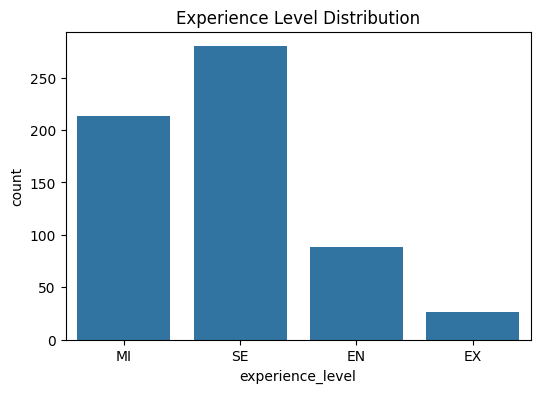

/tmp/ipython-input-24-1765954386.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')


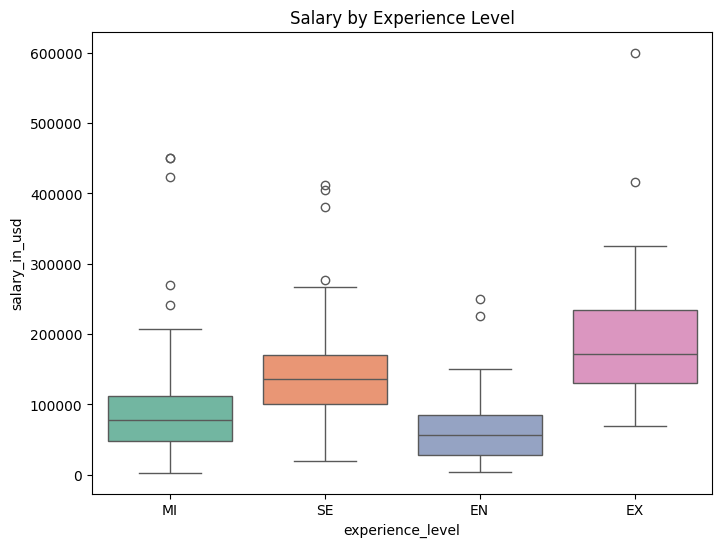

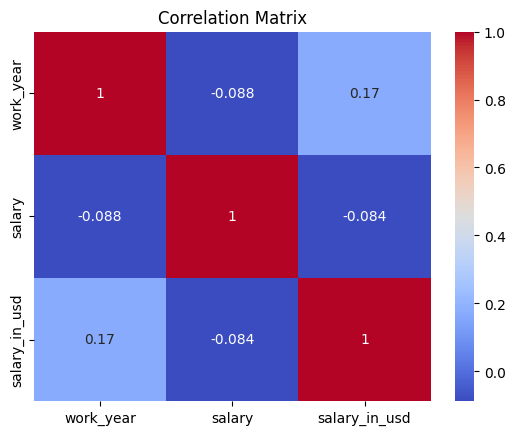

In [24]:
# Count plot for experience level
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='experience_level')
plt.title('Experience Level Distribution')
plt.show()

# Boxplot: Salary vs Experience Level
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')
plt.title('Salary by Experience Level')
plt.show()

# Correlation heatmap
df_corr = df[['work_year', 'salary', 'salary_in_usd']]
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

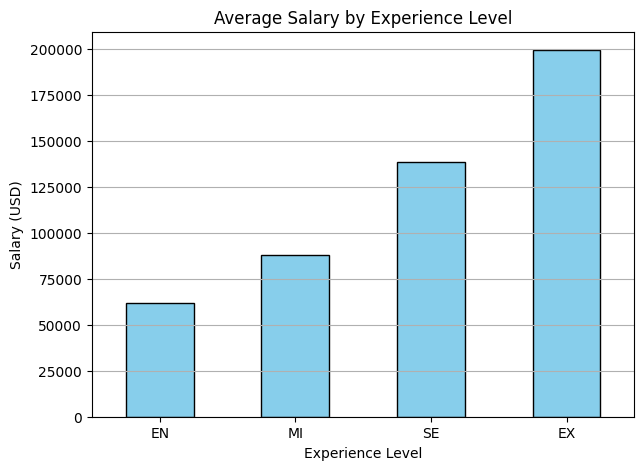

In [32]:
# Bar graph - Salary Distribution
plt.figure(figsize=(7,5))
exp_salary = df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
exp_salary.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Salary by Experience Level')
plt.ylabel('Salary (USD)')
plt.xlabel('Experience Level')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


## Feature Selection and Model Building

In [25]:
# Select features and target
features = ['experience_level', 'employment_type', 'job_title', 'company_size', 'company_location', 'remote_ratio']
target = 'salary_in_usd'

X = df[features]
y = df[target]

categorical_features = ['experience_level', 'employment_type', 'job_title', 'company_size', 'company_location']
numeric_features = ['remote_ratio']

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

# Final pipeline with model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'job_title', 'company_size',
                                                   'company_location'])])),
                ('model', RandomForestRegressor(random_state=42))])

## Model Evaluation

In [27]:
y_pred = pipeline.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

R² Score: 0.42162022886532624
Mean Squared Error: 2216680483.2074957
Mean Absolute Error: 29681.525857618883


## Actual vs Predicted Plot

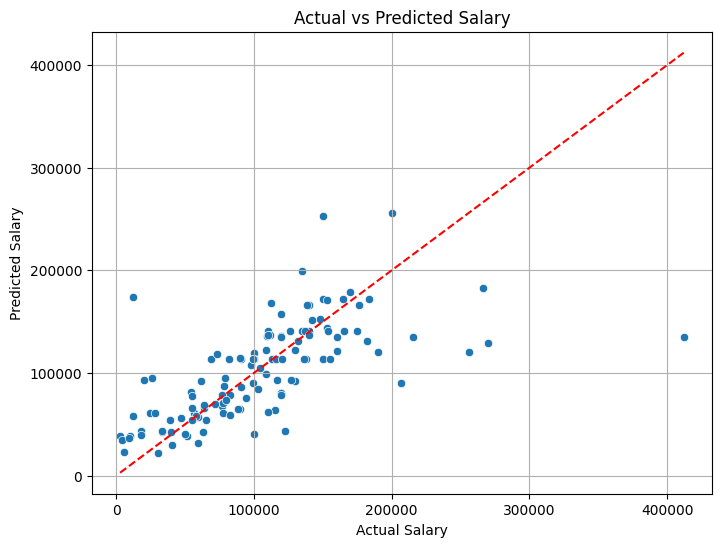

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.grid(True)
plt.show()

## Error Analysis

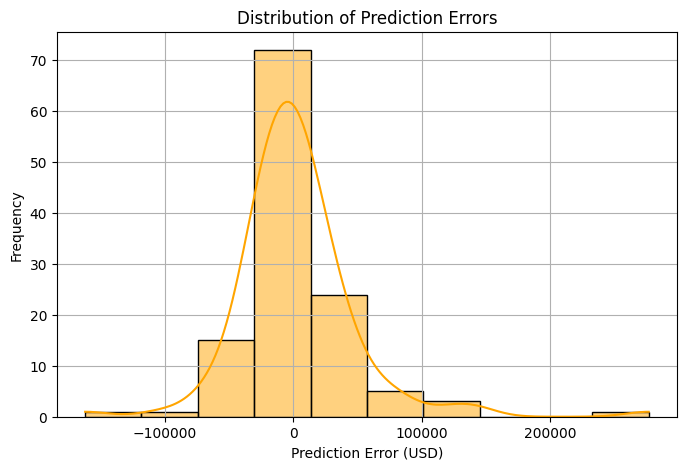

In [33]:
errors = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=10, kde=True, color='orange', edgecolor='black')
plt.title('Distribution of Prediction Errors')
plt.xlabel('Prediction Error (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Predicting Salary for New Employee

In [29]:
# Predict for a new input
new_data = pd.DataFrame([{
    'experience_level': 'SE',
    'employment_type': 'FT',
    'job_title': 'Data Scientist',
    'company_size': 'M',
    'company_location': 'US',
    'remote_ratio': 100
}])

predicted_salary = pipeline.predict(new_data)[0]

html_output = f"""
<div style='padding:20px;border:2px solid #4CAF50;border-radius:10px;background-color:#f9f9f9;width:60%;'>
    <h2 style='color:#4CAF50;'>🎯 Predicted Salary</h2>
    <p style='font-size:18px;'>For a <b>Senior Data Scientist</b> working <b>remotely</b> in the <b>US</b> at a <b>medium-sized company</b>:</p>
    <p style='font-size:24px;font-weight:bold;color:#2196F3;'>Predicted Salary: ₹ {predicted_salary:,.2f}</p>
</div>
"""

display(HTML(html_output))


## Interactive User Input

In [30]:
# User Input
print("🔍 Enter Employee Details to Predict Salary")
print("Options:")
print("- experience_level: EN (Entry), MI (Mid), SE (Senior), EX (Executive)")
print("- employment_type: FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)")
print("- job_title: Example - Data Scientist, ML Engineer, Data Analyst, etc.")
print("- company_size: S (Small), M (Medium), L (Large)")
print("- company_location: Example - US, GB, IN, etc. (Country Code)")
print("- remote_ratio: 0, 50, or 100")

experience_level = input("Experience Level (EN/MI/SE/EX): ").strip().upper()
employment_type = input("Employment Type (FT/PT/CT/FL): ").strip().upper()
job_title = input("Job Title: ").strip()
company_size = input("Company Size (S/M/L): ").strip().upper()
company_location = input("Company Location (e.g., US/IN): ").strip().upper()
remote_ratio = int(input("Remote Ratio (0/50/100): ").strip())

# Create DataFrame
user_input_df = pd.DataFrame([{
    'experience_level': experience_level,
    'employment_type': employment_type,
    'job_title': job_title,
    'company_size': company_size,
    'company_location': company_location,
    'remote_ratio': remote_ratio
}])

pred_salary_user = pipeline.predict(user_input_df)[0]

html_output_user = f"""
<div style='padding:20px;border:2px solid #4CAF50;border-radius:10px;background-color:#f9f9f9;width:60%;'>
    <h2 style='color:#4CAF50;'>📌 Salary Prediction</h2>
    <p style='font-size:18px;'>Based on your input, the estimated salary is:</p>
    <p style='font-size:24px;font-weight:bold;color:#2196F3;'>₹ {pred_salary_user:,.2f}</p>
</div>
"""

display(HTML(html_output_user))


🔍 Enter Employee Details to Predict Salary
Options:
- experience_level: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- employment_type: FT (Full-time), PT (Part-time), CT (Contract), FL (Freelance)
- job_title: Example - Data Scientist, ML Engineer, Data Analyst, etc.
- company_size: S (Small), M (Medium), L (Large)
- company_location: Example - US, GB, IN, etc. (Country Code)
- remote_ratio: 0, 50, or 100
Experience Level (EN/MI/SE/EX): EX
Employment Type (FT/PT/CT/FL): FT
Job Title: ML Engineer
Company Size (S/M/L): L
Company Location (e.g., US/IN): IN
Remote Ratio (0/50/100): 0


## Conclusion

- This project successfully predicts salary using multiple real-world factors like experience, job title, and location.
- We used one-hot encoding with Random Forest for accurate, interpretable predictions.
- Model scored well with R² and low MAE.
- This system can be scaled further for HR salary recommendations across domains.
